# **Logistic regression for multi-class classification using one vs all strategy**

**Importing Necessary libraries**

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

**Defining Logistic regression class**

In [40]:
class LogisticRegression:
    def __init__(self, lr=0.0009, epochs=10000):
        self.lr = lr
        self.epochs = epochs
        self.thetas = np.ones(5)
        self.loss = []
        self.gradients = None
        self.accuracy = []

    def Predict_Confidence(self, X):
        X = np.hstack((X, np.ones((X.shape[0], 1))))
        return [1.0 / (1 + np.exp(-np.dot(np.array(i).T, self.thetas))) for i in X]

    def Loss(self, h, labels):
        epsilon = 1e-10 
        loss = 0
        for X in range(len(h)):
            loss += -(labels[X] * np.log(h[X] + epsilon) + (1 - labels[X]) * np.log(1 - h[X] + epsilon))
        return loss / len(h)


    def gradient(self, data, h, labels):
        data= np.hstack((data, np.ones((data.shape[0], 1))))
        grad_list = np.array([])

        for j in range(len(data[0])):
            grad = 0
            for X in range(len(h)):
                grad += ( h[X] - labels[X] ) * data[X][j]
            grad_list = np.append(grad_list, grad)
        return grad_list

    def optim(self):
        return self.thetas - self.lr * self.gradients

    def Predict_Class(self, predict_conf):
        pred = np.array([1 if value > 0.5 else 0 for value in predict_conf])
        return pred

    def Train(self, X, y):
        
        for i in range(self.epochs):
            confidence_scores = self.Predict_Confidence(X)
            self.loss.append(self.Loss(confidence_scores, y))
            if (len(self.loss)>5) and (self.loss[-1]==self.loss[-2]==self.loss[-3]):
                break
            self.gradients = self.gradient(X, confidence_scores, y)
            self.thetas = self.optim()
            self.accuracy.append(accuracy_score(y, self.Predict_Class(confidence_scores)))
            print('Epoch:', i + 1, '|  Loss:', self.loss[i], '|  Accuracy score:', self.accuracy[i])

    def Get_Weights(self):
        return self.thetas


**Training and one vs all strategy**

->Model 1
Epoch: 1 |  Loss: 11.062169518842522 |  Accuracy score: 0.3333333333333333
Epoch: 2 |  Loss: 7.1066902824204 |  Accuracy score: 0.3333333333333333
Epoch: 3 |  Loss: 3.1659327642081903 |  Accuracy score: 0.3333333333333333
Epoch: 4 |  Loss: 0.5482390832851386 |  Accuracy score: 0.6666666666666666
Epoch: 5 |  Loss: 0.5059225569621748 |  Accuracy score: 0.6666666666666666
Epoch: 6 |  Loss: 0.46868229728215205 |  Accuracy score: 0.6666666666666666
Epoch: 7 |  Loss: 0.43547894682797866 |  Accuracy score: 0.675
Epoch: 8 |  Loss: 0.40579493328326327 |  Accuracy score: 0.7083333333333334
Epoch: 9 |  Loss: 0.37922833002109235 |  Accuracy score: 0.7833333333333333
Epoch: 10 |  Loss: 0.3554151819630039 |  Accuracy score: 0.8833333333333333
Epoch: 11 |  Loss: 0.3340268936574261 |  Accuracy score: 0.95
Epoch: 12 |  Loss: 0.3147703745030578 |  Accuracy score: 0.975
Epoch: 13 |  Loss: 0.29738710181401234 |  Accuracy score: 0.975
Epoch: 14 |  Loss: 0.28165072402342106 |  Accuracy score: 0.99

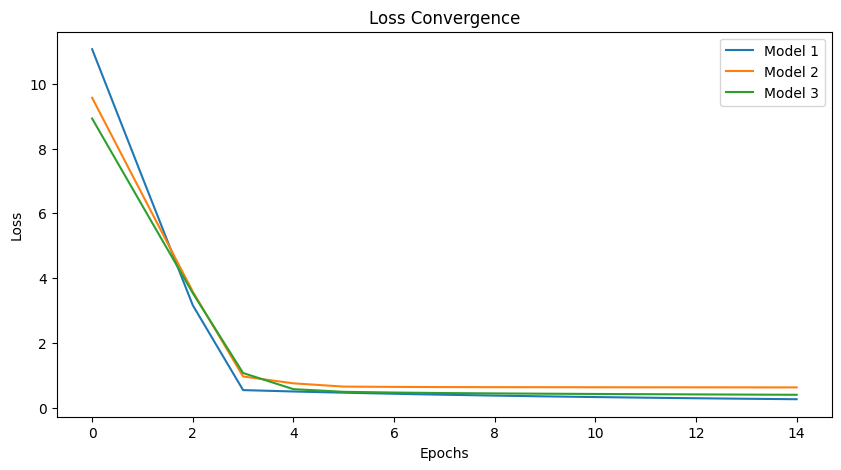

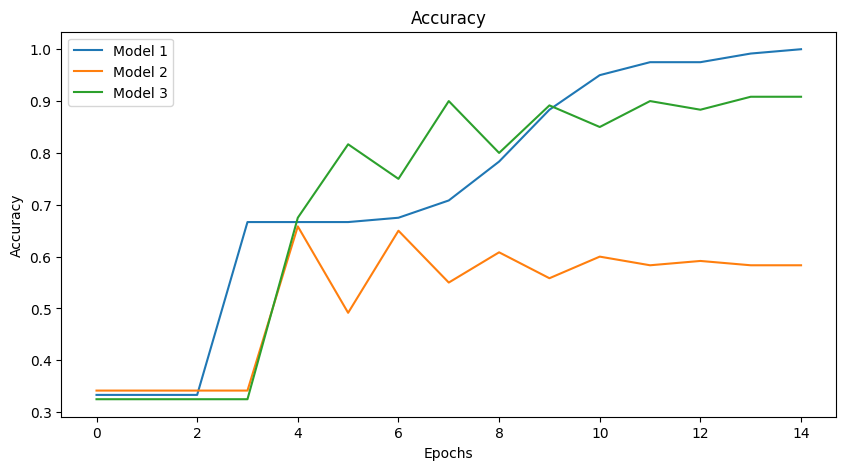

In [41]:
iris = load_iris()
X, y = iris.data, iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = []
for c, class_label in enumerate(np.unique(y_train)):
    y_binary = (y_train == class_label).astype(int)
    model = LogisticRegression(lr=0.001, epochs=15)
    print('->Model',c+1 )
    model.Train(X_train, y_binary)
    print('\n\n')
    models.append(model)

# Predict confidence scores for each class
confidence_scores = []
for model in models:
    confidence_scores.append(model.Predict_Confidence(X_test))

# Convert confidence scores to class predictions
predictions = np.argmax(np.array(confidence_scores), axis=0)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print('\n\n--------------Test Accuracy:', accuracy,'--------------')

plt.figure(figsize=(10, 5))
for i, model in enumerate(models):
    plt.plot(range(model.epochs), model.loss, label=f'Model {i+1}')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Convergence')
plt.legend()
plt.show()

# Visualize accuracies
plt.figure(figsize=(10, 5))
for i, model in enumerate(models):
    plt.plot(range(model.epochs), model.accuracy, label=f'Model {i+1}')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()